In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import os
# cwd = os.getcwd()
cwd='F:\\YW-MSc\\CMT307'

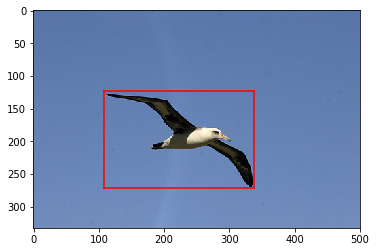

In [6]:
img=imread(cwd+'\\FineGrained_Birds\\CUB_200_2011\\CUB_200_2011\\images\\002.Laysan_Albatross\\Laysan_Albatross_0053_543.jpg')

figure()
plot([108,108],[123,272],'r')
plot([108,338],[123,123],'r')
plot([338,338],[123,272],'r')
plot([108,338],[272,272],'r')
imshow(img)
#grid(True)
#savefig('CMT307_5.png')
show()

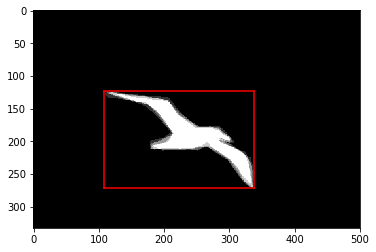

In [8]:
img=imread(cwd+'\\FineGrained_Birds\\segmentations\\segmentations\\002.Laysan_Albatross\\Laysan_Albatross_0053_543.png')

figure()
plot([108,108],[123,272],'r')
plot([108,338],[123,123],'r')
plot([338,338],[123,272],'r')
plot([108,338],[272,272],'r')
imshow(img, cmap=plt.get_cmap('gray'))
#grid(True)
#savefig('CMT307_5-2.png')
show()

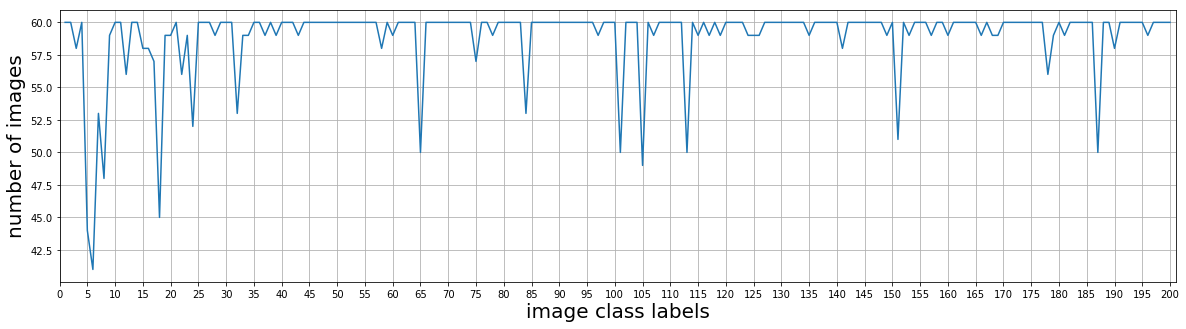

In [9]:
df=pd.read_csv(cwd+'\\FineGrained_Birds\\CUB_200_2011\\CUB_200_2011\\new_image_class_labels.csv', header=None)
df.columns = ['id', 'class']
x=df['id']
y=df['class']
figure(figsize(20, 5))
plot(x,y)
xticks(arange(0,201,5))
xlabel('image class labels', fontsize=20)
ylabel('number of images', fontsize=20)
xlim(0, 201)
grid(True)
#savefig('CMT307_1.png')
show()

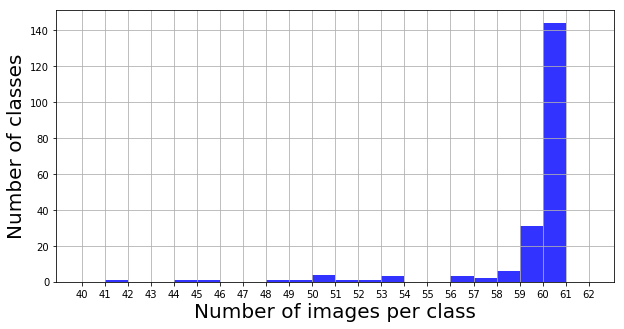

In [10]:
bins = arange(40, 63, 1)
figure(figsize(10, 5))
h=hist(y, bins, color='b', alpha=0.8)
#xlim(3, 25)
#ylim(0,40)
xlabel('Number of images per class', fontsize=20)
ylabel('Number of classes', fontsize=20)
xticks(arange(40,63,1))
grid(True)
#savefig('CMT307-2.png')
show()

In [11]:
with open (cwd+'\\FineGrained_Birds\\CUB_200_2011\\CUB_200_2011\\images.txt', 'r') as file:
    images = file.read()
splitimages = images.split("\n")
#splitimages

In [12]:
row=zeros(11788)
col=zeros(11788)
for i in range(11788):
    img_path = splitimages[i].split(' ')[1]
    img=imread(cwd+'\\FineGrained_Birds\\CUB_200_2011\\CUB_200_2011\\images\\'+img_path)
    row[i]=int(size(img, 0))
    col[i]=int(size(img, 1))
    #d = size(img, 2)
print(row)
print(col)

[335. 336. 347. ... 379. 333. 500.]
[500. 500. 500. ... 500. 500. 357.]


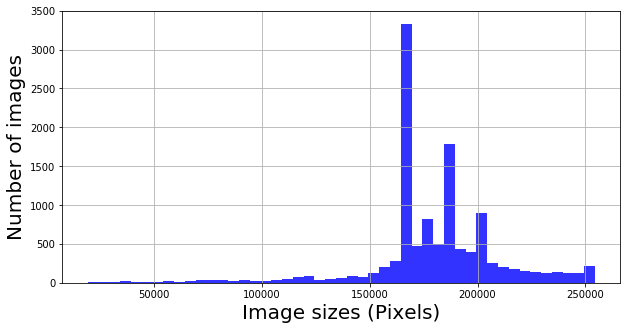

In [13]:
img_size=row*col
bins=range(int(min(img_size)), int(max(img_size))+5000, 5000)

figure(figsize(10, 5))
h=hist(img_size, bins, color='b', alpha=0.8)
#xlim(3, 25)
#ylim(0,40)
xlabel('Image sizes (Pixels)', fontsize=20)
ylabel('Number of images', fontsize=20)
#xticks(arange(40,63,1))
grid(True)
#savefig('CMT307-3.png')
show()

In [14]:
with open (cwd+'\\FineGrained_Birds\\CUB_200_2011\\CUB_200_2011\\bounding_boxes.txt', 'r') as file:
    images = file.read()
bbox = images.split("\n")

In [15]:
bbox_size=zeros(11788)
for i in range(11788):
    width = bbox[i].split(' ')[3]
    height = bbox[i].split(' ')[4]
    bbox_size[i] = float(width) * float(height)

print(bbox_size)

[ 98800.  40392.  72168. ...  39996. 125256.  46551.]


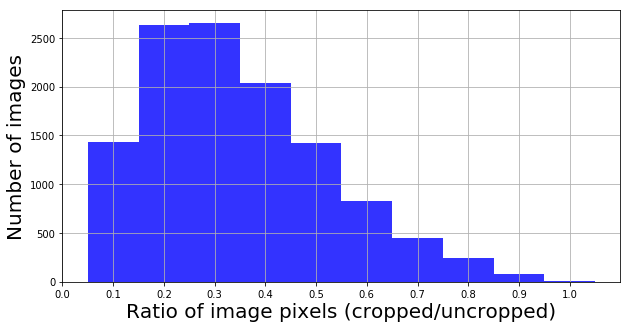

In [16]:
ratio = bbox_size/img_size

bins=arange(min(ratio), max(ratio)+0.1, 0.1)
figure(figsize(10, 5))
h=hist(ratio, bins, color='b', alpha=0.8)
#xlim(3, 25)
#ylim(0,40)
xlabel('Ratio of image pixels (cropped/uncropped)', fontsize=20)
ylabel('Number of images', fontsize=20)
xticks(arange(0,1.1,0.1))
grid(True)
#savefig('CMT307-4.png')
show()

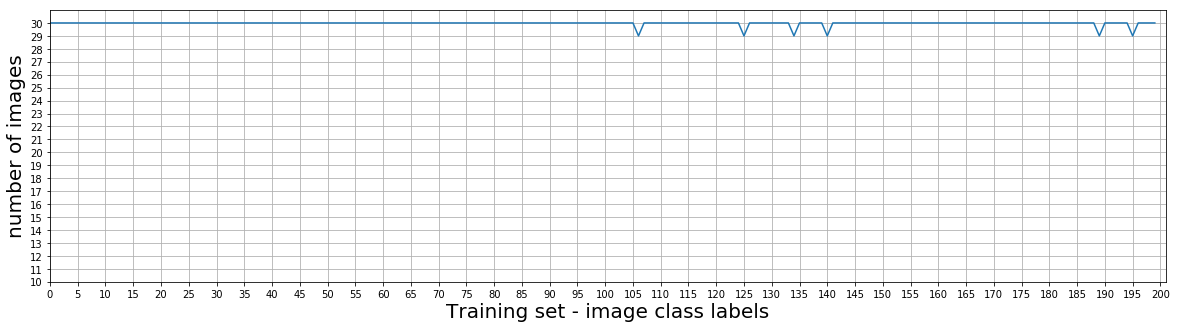

In [17]:
clabel=pd.read_csv(cwd+'\\FineGrained_Birds\\CUB_200_2011\\CUB_200_2011\\image_class_labels.txt', sep=' ', header=None)
clabel.columns = ['img', 'class_label']
tlabel=pd.read_csv(cwd+'\\FineGrained_Birds\\CUB_200_2011\\CUB_200_2011\\train_test_split.txt', sep=' ', header=None)
tlabel.columns = ['img', 'is_train']
df=pd.merge(clabel, tlabel)

test_set=df[df['is_train']==0]
train_set=df[df['is_train']==1]

train_dis=train_set.groupby('class_label')['is_train'].count()
test_dis=test_set.groupby('class_label')['is_train'].count()

x=arange(200)
y=train_dis.values
figure(figsize(20, 5))
plot(x,y)
xticks(arange(0,201,5))
yticks(arange(10,31,1))
xlabel('Training set - image class labels', fontsize=20)
ylabel('number of images', fontsize=20)
xlim(0, 201)
ylim(10, 31)
grid(True)
#savefig('CMT307_1.png')
show()

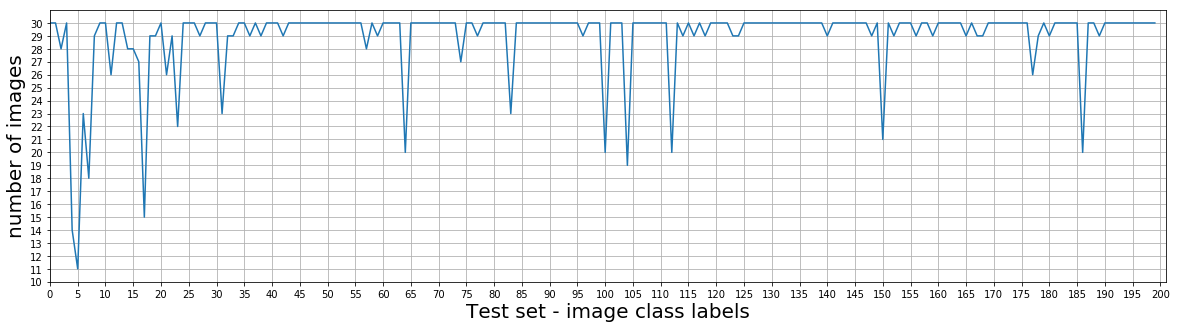

In [18]:
x=arange(200)
y=test_dis.values
figure(figsize(20, 5))
plot(x,y)
xticks(arange(0,201,5))
yticks(arange(10,31,1))
xlabel('Test set - image class labels', fontsize=20)
ylabel('number of images', fontsize=20)
xlim(0, 201)
ylim(10, 31)
grid(True)
#savefig('CMT307_1.png')
show()

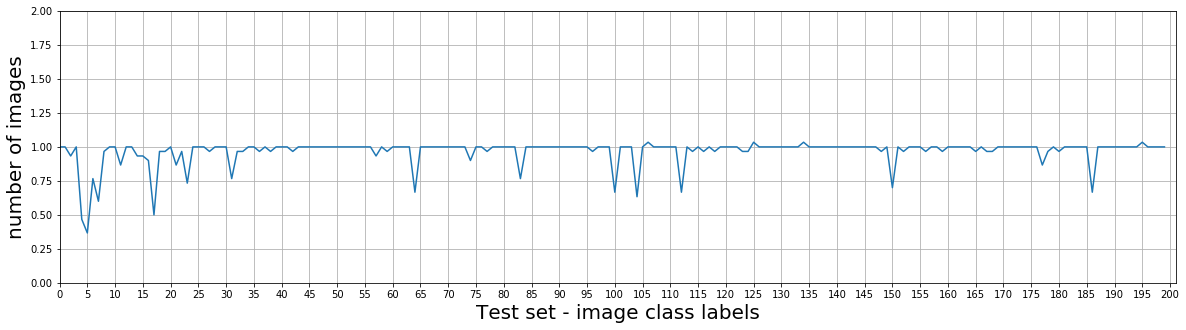

In [19]:
x=arange(200)
y=test_dis.values/train_dis.values
figure(figsize(20, 5))
plot(x,y)
xticks(arange(0,201,5))
#yticks(arange(10,31,1))
xlabel('Test set - image class labels', fontsize=20)
ylabel('number of images', fontsize=20)
xlim(0, 201)
ylim(0, 2)
grid(True)
#savefig('CMT307_1.png')
show()

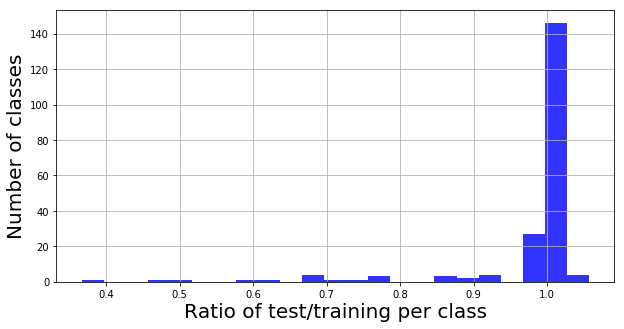

In [20]:
ratio=y
bins=arange(min(ratio), max(ratio)+0.03, 0.03)
figure(figsize(10, 5))
h=hist(ratio, bins, color='b', alpha=0.8)
#xlim(3, 25)
#ylim(0,40)
xlabel('Ratio of test/training per class', fontsize=20)
ylabel('Number of classes', fontsize=20)
#xticks(arange(0,1.1,0.1))
grid(True)
#savefig('CMT307-6.png')
show()